# Programmation scientifique en python
Python devient de plus en plus une alternative à des outils traditionnels de l'ingénieur, comme Matlab, et son usage s'étend dans la communauté scientifique.  

**Pourquoi ?** 
- il est gratuit et ouvert 
- c'est un "vrai" langage de programmation  
- il bénéficie de la communauté open source: en progression constante
- il unifie de nombreuses bibliothèques existant dans différents langages (algèbre, analyse, statistiques, traitement signal, etc)
- librairie python pour "emballer" le tout: [scipy](http://www.scipy.org/), 
- c'est devenu aussi un des premiers langages en analyse de donnée, IA, Machine Learning

**On verra**
- le calcul matriciel avec `numpy` (base de nombreux autres outils)
- une introduction à quelques outils pertinents
    - traitement signal
    - traitement d'image
    - apprentissage automatique
    - graphes
    - robotique

## Programmation vectorielle: numerical python (`numpy`)
Introduction à la programmation scientifique et l'utilisation de vecteurs/matrices
- définitions, créations
- index/références
- quelques opérations / exemples de calcul vectorisé 
- règles de "broadcasting" (composition)
- opérations + complexes, convolution (ex: automates cellulaires, fractales)

**Exemple de création d'un vecteur**

In [2]:
import numpy as np
a = np.random.random(100)
print(type(a))
print(a) 

<class 'numpy.ndarray'>
[0.94672174 0.777982   0.05544137 0.6376867  0.15278675 0.07796265
 0.49674305 0.17063842 0.55689189 0.93383587 0.55190683 0.82137341
 0.77976849 0.36923066 0.85195162 0.05634205 0.02916764 0.45209345
 0.37320386 0.13774698 0.41999163 0.12423495 0.91219923 0.90461518
 0.05930408 0.95465765 0.10996136 0.53603446 0.23750867 0.94919416
 0.24662579 0.56223238 0.04585921 0.54932569 0.03697519 0.71573109
 0.95160695 0.59515542 0.50217732 0.90564791 0.44526434 0.74678915
 0.01860948 0.93052585 0.25287874 0.38847705 0.24069513 0.58341842
 0.5327723  0.39000335 0.4679864  0.22620893 0.58034657 0.11607604
 0.09314569 0.14147769 0.16235602 0.192269   0.4334869  0.49408782
 0.85302606 0.08642236 0.05849005 0.40944406 0.73306021 0.22252006
 0.07277484 0.48373495 0.99339138 0.11003226 0.83499101 0.38340179
 0.11019572 0.620167   0.06713026 0.88767089 0.01640038 0.32366003
 0.63673555 0.15309067 0.0855866  0.15616341 0.85264874 0.33469158
 0.74820849 0.28799608 0.73871746 0.72

In [5]:
print(a[:10])
b = a[:10]
print(a.min(),a.max(),a.mean())

[0.94672174 0.777982   0.05544137 0.6376867  0.15278675 0.07796265
 0.49674305 0.17063842 0.55689189 0.93383587]
0.015738729841423105 0.9933913819568069 0.4534171490091281


In [7]:
b[0] = -100
print(a[:10])

[-1.00000000e+02  7.77981998e-01  5.54413725e-02  6.37686700e-01
  1.52786747e-01  7.79626476e-02  4.96743054e-01  1.70638416e-01
  5.56891888e-01  9.33835867e-01]


## Calcul vectorisé

In [8]:
# on peut pas ...
from math import cos
print(cos(a))

TypeError: only size-1 arrays can be converted to Python scalars

In [10]:
# numpy a des fonctions "universelles"
from numpy import cos 
c = cos(a)
print(c[:10])

[0.86231887 0.71233131 0.99846352 0.8034751  0.98835079 0.99696245
 0.87913937 0.98547656 0.848902   0.59475468]


In [11]:
# et des opérations vectorielles / matricielles
(a+a)[:10]

array([-2.00000000e+02,  1.55596400e+00,  1.10882745e-01,  1.27537340e+00,
        3.05573493e-01,  1.55925295e-01,  9.93486109e-01,  3.41276832e-01,
        1.11378378e+00,  1.86767173e+00])

In [13]:
(a*a)[:10]

array([1.00000000e+04, 6.05255989e-01, 3.07374578e-03, 4.06644327e-01,
       2.33437899e-02, 6.07817443e-03, 2.46753662e-01, 2.91174691e-02,
       3.10128575e-01, 8.72049427e-01])

### Comparaison de performances

In [6]:
b = list(a)
print(b[:10])

[0.48051869005900694, 0.2554604048246045, 0.2736316638165561, 0.5026538041315873, 0.33159284767816166, 0.06994022144236633, 0.687144921841489, 0.9669654967179528, 0.28618061710658027, 0.239228534044168]


In [14]:
%timeit a**2

402 ns ± 0.527 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [18]:
 %timeit [x**2 for x in b]

1.98 µs ± 37.4 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [19]:
%%timeit 
s = 0
for x in b: 
    z =  x**2


1.71 µs ± 39 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## Indexation et dimensions

In [22]:
c = np.random.random(1000)
print(type(c))
print(c[9])
c.shape

<class 'numpy.ndarray'>
0.10232902193950799


(1000,)

In [23]:
nc = 100
c = c.reshape(c.shape[0]//nc,nc) 
print(c[0,9])
print(c.shape) 
print(c[:,2:4]) 

0.10232902193950799
(10, 100)
[[0.35704359 0.25655727]
 [0.83361052 0.82421949]
 [0.93918986 0.72944163]
 [0.47697811 0.54514777]
 [0.22345284 0.32100209]
 [0.22334655 0.48902418]
 [0.72730303 0.34769367]
 [0.86896049 0.47229427]
 [0.45148512 0.48341543]
 [0.81972989 0.0097976 ]]


In [12]:
print(c[:,1])
print(c[1::2,1])

[0.74349955 0.58806515 0.19535212 0.27314217 0.36251538 0.10110587
 0.32091266 0.64757571 0.65400341 0.25841136]
[0.58806515 0.27314217 0.10110587 0.64757571 0.25841136]


## Création

In [13]:
import numpy as np
c = np.zeros(shape=(3,4))
print(c.shape)
print(c)
c.ravel()

(3, 4)
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [14]:
c = np.arange(10)  
print (c)

[0 1 2 3 4 5 6 7 8 9]


In [25]:
c  = np.arange(0.,3.14,0.05) 
cos(c)

array([ 1.        ,  0.99875026,  0.99500417,  0.98877108,  0.98006658,
        0.96891242,  0.95533649,  0.93937271,  0.92106099,  0.9004471 ,
        0.87758256,  0.85252452,  0.82533561,  0.7960838 ,  0.76484219,
        0.73168887,  0.69670671,  0.65998315,  0.62160997,  0.58168309,
        0.54030231,  0.49757105,  0.45359612,  0.40848744,  0.36235775,
        0.31532236,  0.26749883,  0.21900669,  0.16996714,  0.12050277,
        0.0707372 ,  0.02079483, -0.02919952, -0.07912089, -0.12884449,
       -0.17824606, -0.22720209, -0.27559025, -0.32328957, -0.37018083,
       -0.41614684, -0.46107269, -0.5048461 , -0.54735767, -0.58850112,
       -0.62817362, -0.66627602, -0.70271308, -0.73739372, -0.77023125,
       -0.80114362, -0.83005354, -0.85688875, -0.8815822 , -0.90407214,
       -0.92430238, -0.94222234, -0.95778724, -0.97095817, -0.9817022 ,
       -0.9899925 , -0.99580832, -0.99913515])

In [27]:
%timeit cos(c)

871 ns ± 14.1 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [30]:
from math import cos as badcos
lc = list(c)

In [31]:
%timeit [badcos(x) for x in lc]

3.38 µs ± 5.53 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [32]:
c = np.linspace(0, 1.0,101)
c

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

## Création (suite)

In [33]:
np.zeros((2,2))

array([[0., 0.],
       [0., 0.]])

In [34]:
np.ones((2,2))

array([[1., 1.],
       [1., 1.]])

In [35]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Références 

attention aux références -> différent des listes  
les "tranches" de vecteurs/matrices sont justes des "vues" sur le vecteur

In [20]:
c[1] = 0
print(c)
a = c[1:-1] 
c[1] = -1
print(a[:10])

[0.   0.   0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[-1.    0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1 ]


In [36]:
# Mais on peut faire des copies: 
c[0] = 0
a = np.zeros(c.shape)
# ou  
#a[:] = c
a[...] = c
c[0] = 2
print(a[:10])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]


## Index Conditionnels

In [37]:
print(a,a.shape)
ia1 = np.argwhere(a>0.55)
ia2 = np.argwhere((a>.55) | (a<0.2))
print(ia2.T)
print(ia2.shape)

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ] (101,)
[[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
   18  19  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
   72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
   90  91  92  93  94  95  96  97  98  99 100]]
(65, 1)


In [23]:
print(a[ia2].shape)
#print(a[ia2])
print(a[ia1].ravel())
print(a[ia2].ravel()) 

(65, 1)
[0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
 0.98 0.99 1.  ]
[ 0.   -1.    0.02  0.03  0.04  0.05  0.06  0.07  0.08  0.09  0.1   0.11
  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19  0.56  0.57  0.58  0.59
  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71
  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83
  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95
  0.96  0.97  0.98  0.99  1.  ]


In [38]:
print(a[(a<0.2) | (a>0.55)])

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63
 0.64 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77
 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91
 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]


In [40]:
# masque booléen: (a<0.2) | (a>0.55)

In [25]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Exemples d'utilisation : calcul vectoriel

In [42]:
a = np.arange(50)
print(a)
res = 4*a*a
print(res)
res.sum()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[   0    4   16   36   64  100  144  196  256  324  400  484  576  676
  784  900 1024 1156 1296 1444 1600 1764 1936 2116 2304 2500 2704 2916
 3136 3364 3600 3844 4096 4356 4624 4900 5184 5476 5776 6084 6400 6724
 7056 7396 7744 8100 8464 8836 9216 9604]


161700

Pratique aussi pour calculer/tracer des fonctions numériques : 

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3/dist-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


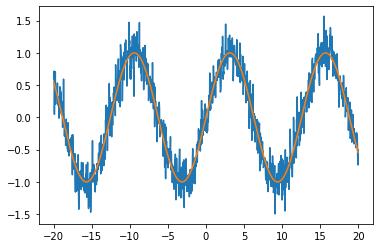

In [44]:
%pylab inline
import pylab 
from numpy import sin

x = np.linspace(-20,20,1000)
a0 = sin(x/2.)
a = a0 + np.random.normal(scale=0.2,size=1000)
f = pylab.plot(x,a)
g = pylab.plot(x,a0)

Faisons une moyenne glissante: on remplace chaque point de a par la moyenne des valeurs voisines:

$$ \frac{ (a_{i-1} + a_{i} + a_{i+1})}{3} $$

$a_0 a_1 a_2 a_3 ... a_{n-3} a_{n-2}$ 

$a_1 a_2 a_3 a_4 ... a_{n-2} a_{n-1}$

$a_2 a_3 a_4 a_5 ... a_{n-1} a_{n}$ 

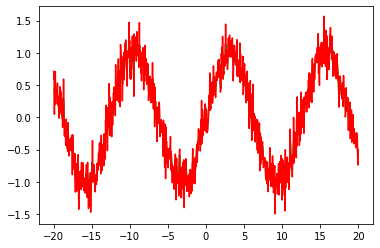

In [47]:
import pylab
# Directement en vectoriel ! 
c = np.copy(a[1:-1])
c += a[:-2] + a[2:]
c *= 1./3.

#c = (a[:-2]+a[-1:1]+a[2:])/3

# on exclut les bornes, mais d'autres choix sont possibles
f1 = pylab.plot(x[1:-1],c,"g")
f2 = pylab.plot(x,a,"r")

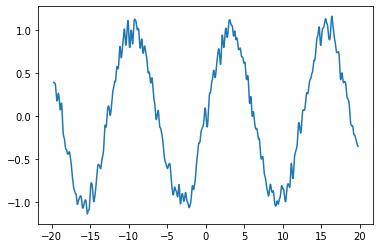

In [48]:
# avec une fonction
def smooth3(a):
    c = np.zeros(len(a)-2)
    c += a[:-2] + a[1:-1] + a[2:]
    c *= 1./3
    return c
    
c = smooth3(a)
for i in range(5):
    c = smooth3(c)
    #pylab.plot(c)
    
#pylab.ylim((0.0,1.0))
f = pylab.plot(x[6:-6],c)
#g = pylab.plot(x,a)

en fait: opération plus générale (convolution) -> existe dans scipy: convolve, et smooth

## Règles de composition ("broadcasting")

In [49]:
a = np.arange(100)
a = a.reshape(10,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [52]:
# l'addition "comprend" comment composer des dimensions différentes 
a+10

array([[ 10,  11,  12,  13,  14,  15,  16,  17,  18,  19],
       [ 20,  21,  22,  23,  24,  25,  26,  27,  28,  29],
       [ 30,  31,  32,  33,  34,  35,  36,  37,  38,  39],
       [ 40,  41,  42,  43,  44,  45,  46,  47,  48,  49],
       [ 50,  51,  52,  53,  54,  55,  56,  57,  58,  59],
       [ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69],
       [ 70,  71,  72,  73,  74,  75,  76,  77,  78,  79],
       [ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89],
       [ 90,  91,  92,  93,  94,  95,  96,  97,  98,  99],
       [100, 101, 102, 103, 104, 105, 106, 107, 108, 109]])

In [53]:
a[:2,0:3]

array([[ 0,  1,  2],
       [10, 11, 12]])

In [54]:
b = np.arange(10)-5
print(b)

[-5 -4 -3 -2 -1  0  1  2  3  4]


In [56]:
print(a)
a+b

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]


array([[ -5,  -3,  -1,   1,   3,   5,   7,   9,  11,  13],
       [  5,   7,   9,  11,  13,  15,  17,  19,  21,  23],
       [ 15,  17,  19,  21,  23,  25,  27,  29,  31,  33],
       [ 25,  27,  29,  31,  33,  35,  37,  39,  41,  43],
       [ 35,  37,  39,  41,  43,  45,  47,  49,  51,  53],
       [ 45,  47,  49,  51,  53,  55,  57,  59,  61,  63],
       [ 55,  57,  59,  61,  63,  65,  67,  69,  71,  73],
       [ 65,  67,  69,  71,  73,  75,  77,  79,  81,  83],
       [ 75,  77,  79,  81,  83,  85,  87,  89,  91,  93],
       [ 85,  87,  89,  91,  93,  95,  97,  99, 101, 103]])

In [57]:
a = np.eye(5)
a[1,2] = 1
print("la matrice de départ\n",a)
print()
print("sous bloc 1\n",a[0:-2,0:-2] )
print()
print("sous bloc 2\n",a[1:-1,1:-1])
print("la somme")
a[0:-2,0:-2] + a[1:-1,1:-1]

la matrice de départ
 [[1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

sous bloc 1
 [[1. 0. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]

sous bloc 2
 [[1. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
la somme


array([[2., 1., 0.],
       [0., 2., 1.],
       [0., 0., 2.]])

## Restructurations

In [58]:
b = 2*a
c = np.concatenate([a,b])
print(c.shape)
print(c)

(10, 5)
[[1. 0. 0. 0. 0.]
 [0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [2. 0. 0. 0. 0.]
 [0. 2. 2. 0. 0.]
 [0. 0. 2. 0. 0.]
 [0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 2.]]


In [65]:
d = np.stack([a,b])
print(d.shape)
print(d)

(2, 5, 5)
[[[1. 0. 0. 0. 0.]
  [0. 1. 1. 0. 0.]
  [0. 0. 1. 0. 0.]
  [0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 1.]]

 [[2. 0. 0. 0. 0.]
  [0. 2. 2. 0. 0.]
  [0. 0. 2. 0. 0.]
  [0. 0. 0. 2. 0.]
  [0. 0. 0. 0. 2.]]]


In [73]:
c2 = np.split(c,5,axis=0)
print(c2)
print(c2[0].shape)

[array([[1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0.]]), array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.]]), array([[0., 0., 0., 0., 1.],
       [2., 0., 0., 0., 0.]]), array([[0., 2., 2., 0., 0.],
       [0., 0., 2., 0., 0.]]), array([[0., 0., 0., 2., 0.],
       [0., 0., 0., 0., 2.]])]
(2, 5)


## Calculs / grilles  en 2D

In [60]:
x = np.linspace(0.,5.,3)
y = np.linspace(0.,3.,4)
(X,Y) = np.meshgrid(x,y)
print(X)
print()
print(Y)


[[0.  2.5 5. ]
 [0.  2.5 5. ]
 [0.  2.5 5. ]
 [0.  2.5 5. ]]

[[0. 0. 0.]
 [1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [61]:
a = X*X + Y*Y 
a

array([[ 0.  ,  6.25, 25.  ],
       [ 1.  ,  7.25, 26.  ],
       [ 4.  , 10.25, 29.  ],
       [ 9.  , 15.25, 34.  ]])

Traitement du signal en python : Scipy, une surcouche de numpy
    
    

## Traitement  de table de données

In [62]:
import pandas as pds

df = pds.DataFrame(a,columns=["X","Pression","T°"])
df

,X,Pression,T°
0,0.0,6.25,25.0
1,1.0,7.25,26.0
2,4.0,10.25,29.0
3,9.0,15.25,34.0


In [39]:
# reprend la syntaxe numpy ... et plus
df[df["Pression"]>10]

,X,Pression,T°
2,4.0,10.25,29.0
3,9.0,15.25,34.0


<AxesSubplot:>

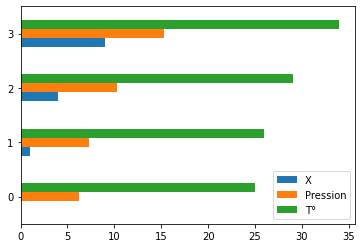

In [63]:
df.plot(kind="barh")

Image et matrice
-----------------

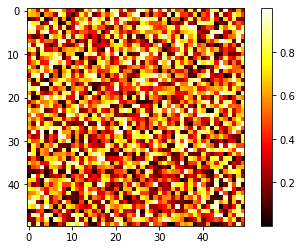

In [41]:
import pylab as plt
image = np.random.rand(50, 50)
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()   

In [42]:
def smooth(image):
    new = np.zeros(image.shape)
    Z = image 
    new[1:-1,1:-1] = (Z[0:-2,0:-2] + Z[0:-2,1:-1] + Z[0:-2,2:] +
                      Z[1:-1,0:-2] + Z[1:-1,1:-1] + Z[1:-1,2:] +
                      Z[2:  ,0:-2] + Z[2:  ,1:-1] + Z[2:  ,2:])/9.
    return new

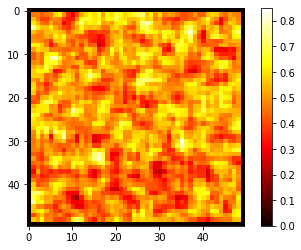

In [43]:
new = smooth(image)

plt.imshow(new, cmap=plt.cm.hot)    
plt.colorbar()   

In [44]:
filtre = np.ones((3,3))/9

In [45]:
filtre, image[0:3,0:3]

(array([[0.11111111, 0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111],
        [0.11111111, 0.11111111, 0.11111111]]),
 array([[0.72980895, 0.62462361, 0.30436814],
        [0.65916427, 0.6322702 , 0.56866938],
        [0.10451554, 0.1783873 , 0.29150162]]))

In [46]:
filtre*image[0:3,0:3]

array([[0.08108988, 0.06940262, 0.03381868],
       [0.07324047, 0.07025224, 0.06318549],
       [0.01161284, 0.01982081, 0.03238907]])

In [47]:
weights = filtre

In [48]:
weights

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

<class 'numpy.ndarray'>
(512, 512) int64


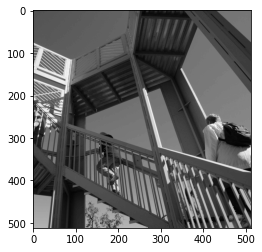

In [49]:
from scipy import misc
example = misc.ascent()
plt.imshow(example,cmap=plt.cm.gray)
print(type(example))
print(example.shape, example.dtype)

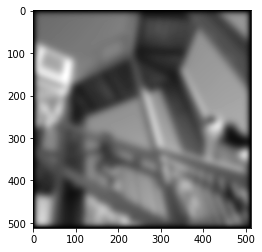

In [50]:
new = example
for i in range(100):
    new = smooth(new)
plt.imshow(new,cmap=plt.cm.gray)

Plusieurs librairies python (ou avec interface python) pour l'image
- `PIL` python imaging library : manipulation de base des formats
- [`OpenCV`](http://opencv.org) : traitements avancés / vision par ordinateur (originellement en C++) / reconnaissance des formes 
- `scikit.image`

## Graphes
Plusieurs librairies disponibles 
- `networkx` (pur python)
- `igraph` (C avec API python)
- matrices creuses en `numpy`

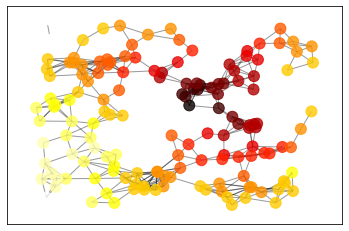

In [51]:
#Exemple

import networkx as nx

# graph aléatoire
G = nx.random_geometric_graph(150, 0.12) 
pos = nx.get_node_attributes(G, 'pos')
#  positions des noeuds, 
# -> trouver le noeud le plus près du centre à (0.5,0.5)
dists = [(x - 0.5)**2 + (y - 0.5)**2 for x, y in pos.values()]
ncenter = np.argmin(dists)
# calculer la longueur des chemins depuis le centre
p = nx.single_source_shortest_path_length(G, ncenter)

# faire la figure: couleur reliée à la longueur des chemins
pylab.figure()
nx.draw_networkx_edges(G, pos, alpha=0.4)
nx.draw_networkx_nodes(G, pos, nodelist=list(p.keys()),
                    node_size=120, alpha=0.8,
                    node_color=list(p.values()), cmap=pylab.cm.hot)
pylab.show()

In [52]:
# exemple igraph 
# exemple numpy 

## Apprentissage automatique / reconnaissance des formes
A partir d'exemples, construire un modèle qui prend des décisions sur des données nouvelles
- classification : déterminer la catégorie d'un événement; exemple détection de spam
- régression : prédire des valeurs d'une fonction à partir d'exemple; exemple: 
- apprendre des politiques d'action pour un robot 

[`scikit-learn`](http://scikit-learn.org) (surcouche de numpy)  
`pytorch`, `tensorflow`, `keras`, etc: réseaux de neurones en folie  
`OpenCV` a aussi des outils reliés, spécialisés pour le traitement d'image

## Robotique 
[ROS](http://wiki.ros.org/) : robot operating system, utilisé dans les TP de robotique. 
  - gestion du hardware 
  - visualisation 
  - communication entre modules avec une API python